In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

In [2]:
from neural_network import NeuralNetwork
from noise_utils import salt_pepper_noise, random_noise, gaussian_noise
from test_utils import generate_test_dataset, train_test, accuracy

# Exercise 3

### Question A

In [3]:
x = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[0],
              [1],
              [1],
              [0]])

In [4]:
df = pd.DataFrame(np.concatenate((x, y), axis=1), columns=('x1', 'x2', 'y'))
df.style.hide()

x1,x2,y
0,0,0
0,1,1
1,0,1
1,1,0


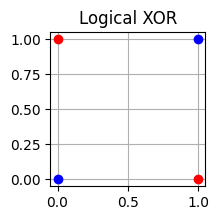

In [5]:
plt.figure(figsize=(2,2))

plt.plot(*x[0], 'o', color='blue')
plt.plot(*x[1], 'o', color='red')
plt.plot(*x[2], 'o', color='red')
plt.plot(*x[3], 'o', color='blue')
plt.grid()
plt.title('Logical XOR')

plt.show()

In [6]:
learning_rate = 0.1
epochs = 10000
nn_A = NeuralNetwork([2, 2, 1], activation_function='sigmoid')
nn_A.train(x, y, learning_rate, epochs, verbose=True)
nn_A.predict(x)

Epoch 0: 0.28427117120763057
Epoch 1000: 0.24250005232621769
Epoch 2000: 0.2011087366926524
Epoch 3000: 0.11530421779151527
Epoch 4000: 0.025189356825109407
Epoch 5000: 0.006340972328971958
Epoch 6000: 0.0024920367359740118
Epoch 7000: 0.0012660116837708937
Epoch 8000: 0.0007487995421110957
Epoch 9000: 0.0004887184112833504


array([[0],
       [1],
       [1],
       [0]])

### Question B

Load raw data

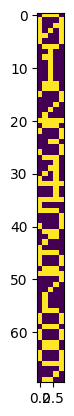

In [7]:
data = np.loadtxt("TP3-ej3-digitos.txt", dtype=np.uint8) 
plt.imshow(data);

Flatten data

In [8]:
data_flattened = data.flatten()
data_flattened = np.reshape(data_flattened, (10, 35))

print(data_flattened.shape)
data_flattened

(10, 35)


array([[0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0],
       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 1, 1, 0, 1

Initialize x input (flattened digit) and y output (result of whether digit is pair)

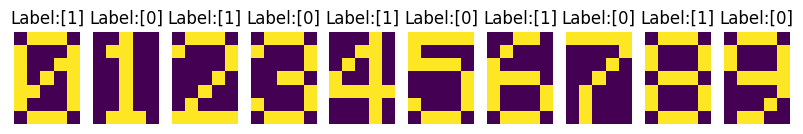

In [9]:
x = data_flattened
y = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0]).reshape(-1, 1)

plt.figure(figsize=(10, 3))
for i, img in enumerate(data_flattened):
    plt.subplot(1, 10, i+1)
    plt.title('Label:' + str(y[i]))
    plt.axis('off')
    plt.imshow(np.reshape(img, (7,5)))

In [10]:
learning_rate = 0.1
epochs = 10000

nn_B = NeuralNetwork([35, 10, 1])
nn_B.train(x, y, learning_rate, epochs, verbose=True)
nn_B.predict(x)

Epoch 0: 0.4782551707015979
Epoch 1000: 0.24935357397892047
Epoch 2000: 0.2442023535261127
Epoch 3000: 0.005250967874855338
Epoch 4000: 0.0007943765015628075
Epoch 5000: 0.00029577165927356555
Epoch 6000: 0.00015190818776303502
Epoch 7000: 9.194823530759595e-05
Epoch 8000: 6.147938891110216e-05
Epoch 9000: 4.394262741164798e-05


array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0]])

digit is even: [[0]]


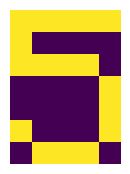

In [11]:
digit = 5

plt.figure(figsize=(2,2))
plt.imshow(np.reshape(data_flattened[digit], (7,5)));
plt.axis('off')
res = nn_B.predict(data_flattened[digit])
print('digit is even:', res)

### Exercise C

Initialize data
- x: 10*35 (10 digits * 35 pixels each)
- y: 10*1 (can be classified to 10 possible digits)

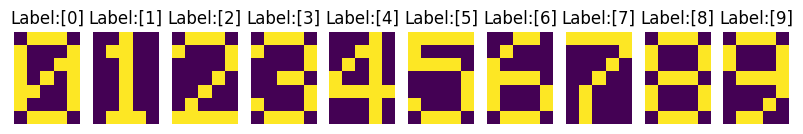

In [12]:
x = data_flattened
y = np.arange(10).reshape(-1, 1)

plt.figure(figsize=(10, 3))
for i, img in enumerate(data_flattened):
    plt.subplot(1, 10, i+1)
    plt.title('Label:' + str(y[i]))
    plt.axis('off')
    plt.imshow(np.reshape(img, (7,5)))

In [13]:
input_size = 35
hidden_size = 10
output_size = 10

learning_rate = 0.1
epochs = 100000

nn_C = NeuralNetwork([35, 10, 10], one_hot=True, activation_function='sigmoid')
nn_C.train(x, y, learning_rate, epochs, verbose=True)
nn_C.predict(x)

Epoch 0: 0.8722286122711445
Epoch 10000: 0.08999216344636393
Epoch 20000: 0.08994870586892487
Epoch 30000: 0.07502240755676669
Epoch 40000: 0.05338791570857196
Epoch 50000: 0.036357963144226325
Epoch 60000: 0.017233394053121832
Epoch 70000: 0.005442377887924038
Epoch 80000: 0.0022319543180451483
Epoch 90000: 0.0011052163983254822


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

digit is: [7]


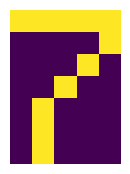

In [14]:
digit = 7

plt.figure(figsize=(2,2))
plt.axis('off')
plt.imshow(np.reshape(data_flattened[digit], (7,5)));
res = nn_C.predict(data_flattened[digit])
print('digit is:', res)

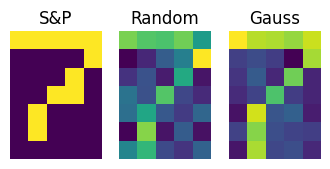

In [15]:
salt_pepper_digit = salt_pepper_noise(data_flattened[digit], 0.05, 0.05)
random_digit = random_noise(data_flattened[digit])
gauss_digit = gaussian_noise(data_flattened[digit], 0.1, 0.1)

noised_data = [salt_pepper_digit, random_digit, gauss_digit]
titles = ['S&P', 'Random', 'Gauss']

plt.figure(figsize=(4,3))
for i, img in enumerate(noised_data):
    plt.subplot(1, 3, i+1)
    plt.title(titles[i])
    plt.axis('off')
    plt.imshow(np.reshape(img, (7,5)));

In [16]:
nn_C.predict(salt_pepper_digit)

array([7])

# Analysis / graphs

## 3a

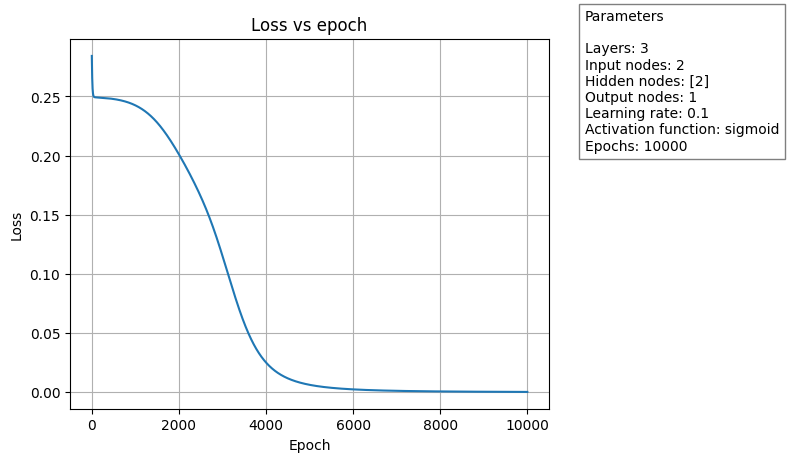

In [17]:
nn_A.graph('loss')

## 3b

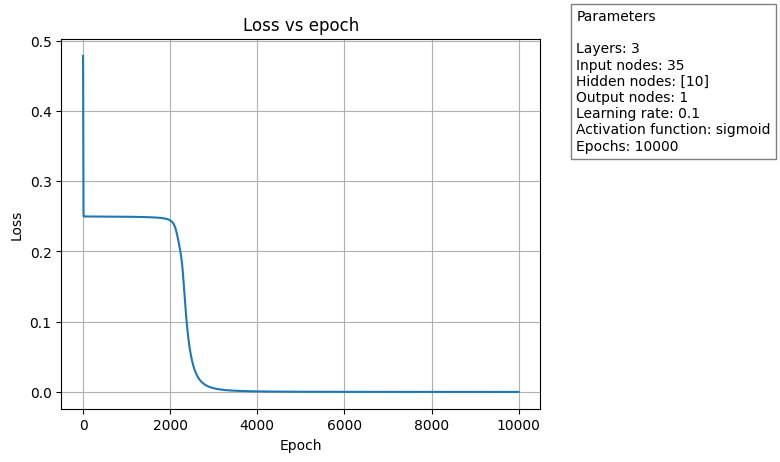

In [18]:
nn_B.graph(graph_type='loss')

## 3c

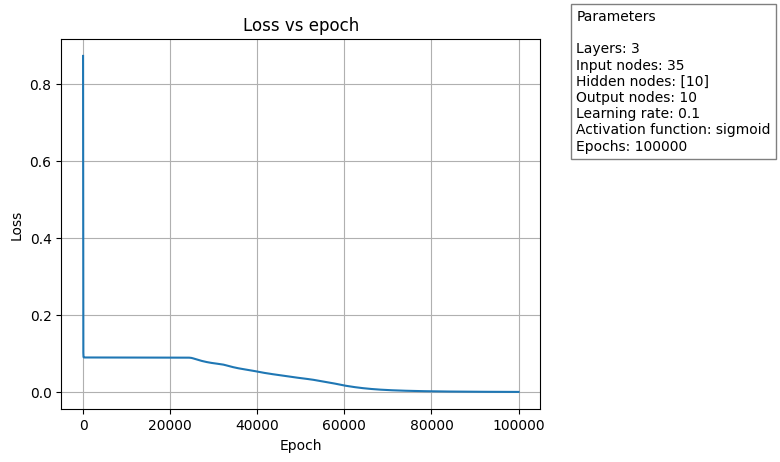

In [19]:
nn_C.graph('loss')

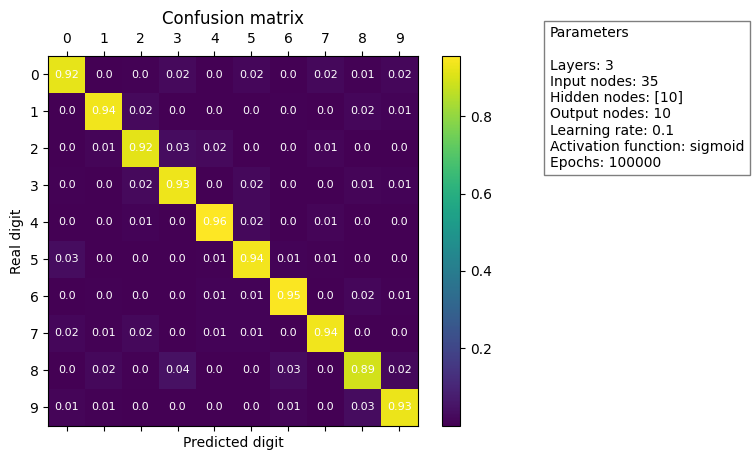

In [20]:
nn_C.graph(graph_type='confusion')

## Train test

In [21]:
num_values = 100
dataX, dataY = generate_test_dataset(num_values, data_flattened)
dataX_train, dataY_train, dataX_test, dataY_test = train_test(dataX, dataY, num_values, 0.75)

In [22]:
learning_rate = 0.1
epochs = 100000

nn = NeuralNetwork([35, 10, 10], one_hot=True, activation_function='sigmoid')
nn.train(dataX_train, dataY_train, learning_rate, epochs, verbose=True)

Epoch 0: 0.8837120798764778
Epoch 10000: 0.08170697746845712
Epoch 20000: 0.06717293509593698
Epoch 30000: 0.02473566837091591
Epoch 40000: 0.010085019490281392
Epoch 50000: 0.004646179141423678
Epoch 60000: 0.0023197835048203224
Epoch 70000: 0.0013084720333186462
Epoch 80000: 0.0008088752102592909
Epoch 90000: 0.0005355674646506578


In [23]:
predictions = nn.predict(dataX_test)
accuracy(predictions, dataY_test)

1.0

### Noised

#### Salt pepper

In [41]:
num_values = 100

salt = 0.05
pepper = 0.05

dataX, dataY = generate_test_dataset(num_values, data_flattened, noise_type='salt_pepper', salt_probability=salt, pepper_probability=pepper)
dataX_train, dataY_train, dataX_test, dataY_test = train_test(dataX, dataY, num_values, 0.75)

In [42]:
learning_rate = 0.1
epochs = 100000

nn = NeuralNetwork([35, 10, 10], one_hot=True, activation_function='sigmoid')
nn.train(dataX_train, dataY_train, learning_rate, epochs, verbose=True)

Epoch 0: 0.8640837010356709
Epoch 10000: 0.08835512253141485
Epoch 20000: 0.07333915284894088
Epoch 30000: 0.06396017184175641
Epoch 40000: 0.05999932926748427
Epoch 50000: 0.04262797718626518
Epoch 60000: 0.01767500913854602
Epoch 70000: 0.007167694371840861
Epoch 80000: 0.0033178048520879776
Epoch 90000: 0.0018395690259141789


In [43]:
predictions = nn.predict(dataX_test)
accuracy(predictions, dataY_test)

0.96